In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
import os
import pandas as pd

# Get the directory where this script is running
script_dir = os.getcwd()  # Dynamically get current working directory

# File name to search
file_name = "WELFake_Dataset.csv"

# Search for the file in all subdirectories
file_path = None
for dirpath, _, filenames in os.walk(script_dir):
    if file_name in filenames:
        file_path = os.path.join(dirpath, file_name)
        break  # Stop searching once found

# Load the dataset if found
if file_path:
    print(f" Dataset found at: {file_path}")
    df = pd.read_csv(file_path)
    print(" Dataset loaded successfully!")
else:
    print(f" Error: '{file_name}' not found inside '{script_dir}' or its subfolders.")


 Dataset found at: /home/grad10/smaity/Project_Midterm_Final/Fake News Classification/WELFake_Dataset.csv
 Dataset loaded successfully!


In [4]:
# Load Dataset
#file_path = r"Fake News Classification\WELFake_Dataset.csv" # Update with your dataset path


import os
print(os.getcwd())  # Print current working directory
file_path = r"Fake News Classification/WELFake_Dataset.csv"

df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)
df.head()


/home/grad10/smaity/Project_Midterm_Final
Dataset Shape: (72134, 4)
Dataset Columns: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Data Cleaning - Drop missing values
df = df.dropna()

# Extract relevant columns
if 'label' in df.columns and 'text' in df.columns:
    X = df['text']
    y = df['label'].map({'FAKE': 0, 'REAL': 1})  # Convert labels to binary
else:
    raise ValueError("Dataset does not have required columns: 'text' and 'label'")


Missing Values in Dataset:
Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [6]:
# Check for missing values in target variable
print(f"Missing values in y: {y.isnull().sum()}")

# Drop rows where y is NaN
df = df.dropna(subset=['label'])  # Assuming 'label' is your target column

# Extract X (features) and y (target) again
X = df['text']  # Assuming 'text' is your feature column
y = df['label']  # Assuming 'label' is your target column


Missing values in y: 71537


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(" Data successfully split into training and testing sets!")

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

 Data successfully split into training and testing sets!


In [8]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")
    print(classification_report(y_test, y_pred))
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


Training Decision Tree...
Decision Tree Accuracy: 0.9098

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      7006
           1       0.90      0.93      0.91      7302

    accuracy                           0.91     14308
   macro avg       0.91      0.91      0.91     14308
weighted avg       0.91      0.91      0.91     14308

Training Random Forest...
Random Forest Accuracy: 0.9427

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7006
           1       0.92      0.97      0.95      7302

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308

Training AdaBoost...
AdaBoost Accuracy: 0.9177

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7006
           1       0.90      0.94      0.92      7302

    accuracy      

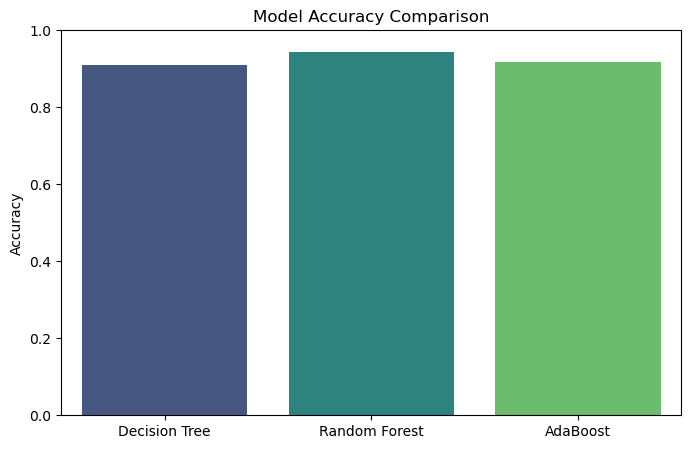

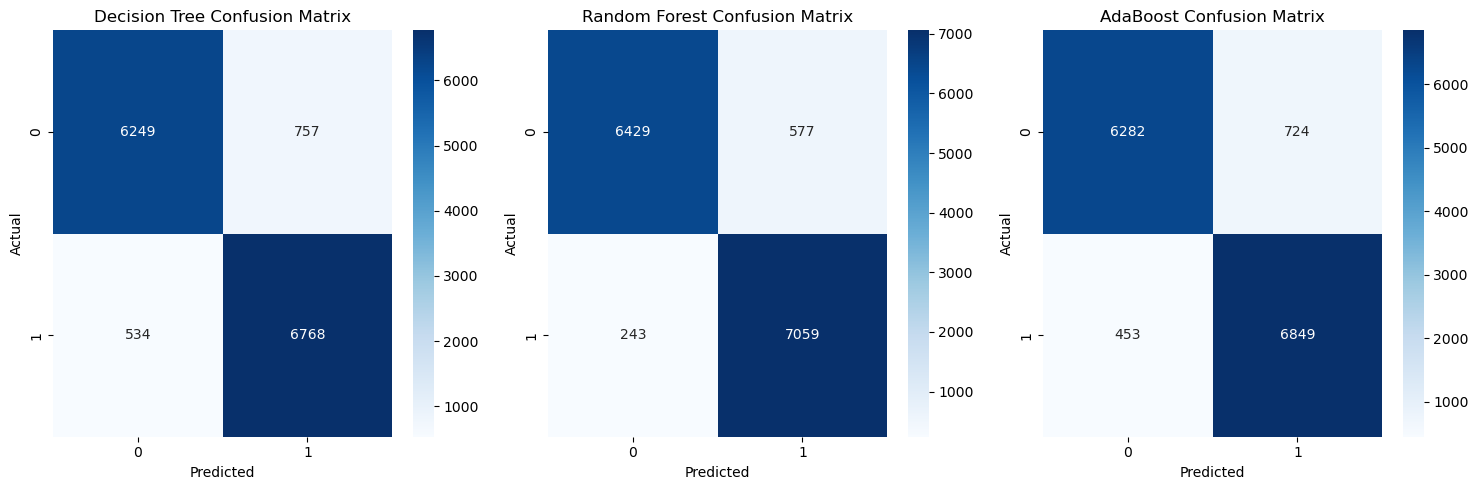

Analysis complete. Models evaluated successfully!


In [9]:
# Visualizing Performance
acc_values = [results[model]["Accuracy"] for model in models]
plt.figure(figsize=(8,5))
sns.barplot(x=list(models.keys()), y=acc_values, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Display Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.tight_layout()
plt.show()

print("Analysis complete. Models evaluated successfully!")
